### Exploring this Data Reading Repo [Herbie](https://github.com/blaylockbk/Herbie)

https://registry.opendata.aws/noaa-hrrr-pds/

https://herbie.readthedocs.io/en/stable/user_guide/tutorial/intro.html

In [11]:
from herbie import Herbie

# Herbie object for the HRRR model 6-hr surface forecast product
H = Herbie(
  '2021-01-01 12:00',
  model='hrrr',
  product='sfc',
  fxx=6
)

# Look at file contents
H.inventory()

# Download the full GRIB2 file
H.download()

# Download a subset, like all fields at 500 mb
H.download(":500 mb")

# Read subset with xarray, like 2-m temperature.
H.xarray("TMP:2 m")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jan-01 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/Users/jerryluo/data/hrrr/20210101]


<xarray.Dataset> Size: 38MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2021-01-01T12:00:00
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2021-01-01T18:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 8MB 292.7 292.8 292.8 ... 271.2 271.2
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             /Users/jerryluo/data/hrrr/20210101/hrrr.t12z.wrf...
    local_grib:              /Users/jerryluo/data/hrrr/20210101/subset_8fb2fd...
    search:                  TMP:2 m

/Users/jerryluo/Desktop/Spring-25/ie421-group8-weatherdata/venv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/jerryluo/Desktop/Spring-25/ie421-group8-weatherdata/venv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


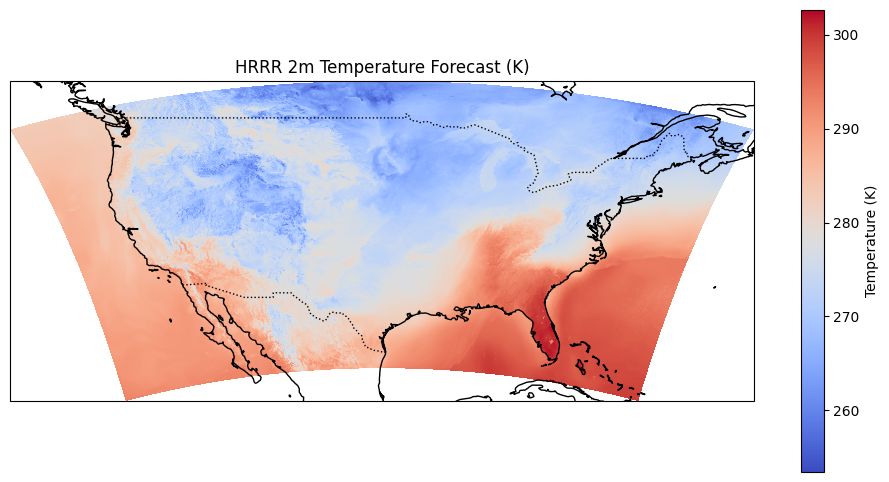

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract temperature, lat, lon
temperature = ds['t2m']          # Shape: (y, x)
lat = ds['latitude']             # Shape: (y, x)
lon = ds['longitude']            # Shape: (y, x)

# Create plot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot temperature with pcolormesh
pcm = ax.pcolormesh(
    lon, lat, temperature,
    cmap="coolwarm",
    shading='auto',  # Fixes alignment issues
    transform=ccrs.PlateCarree()
)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title("HRRR 2m Temperature Forecast (K)")

# Add colorbar
plt.colorbar(pcm, ax=ax, label="Temperature (K)")

# Show plot
plt.show()
